#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Membaca file .csv

In [2]:
df = pd.read_csv("survey.csv")
df.head(10)

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,-,C#,10000 - 25000,edutech
5,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
6,Jane Smith,31-40,React,Java,more than 60000,fintech
7,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
8,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
9,Emily Davis,21-25,-,C#,10000 - 25000,edutech


#### Data Cleaning

In [3]:
# menghapus data duplikat
df = df.drop_duplicates()
# mereset index dataframe
df = df.reset_index(drop=True)

# mengambil data dari kolom favorite_front_end yang paling banyak muncul
top_front_end = df["favorite_front_end"].value_counts().nlargest(1)
# mengubah nilai "-" pada kolom favorite_front_end menjadi front end yang paling banyak diminati
df["favorite_front_end"] = df["favorite_front_end"].replace('-', str(top_front_end.index[0]))

# mengubah nilai "-" pada kolom age menjadi "26-30"
df["age"] = df["age"].replace('-', '26-30')
# mengubah nilai "19" pada kolom age menjadi "17-20" untuk memudahkan klasifikasi umur
df["age"] = df["age"].replace('19', '17-20')

# mengisi nilai kolom salary_per_year_in_USD yang kosong dengan "more than 60000" untuk memudahkan klasifikasi penghasilan
df["salary_per_year_in_USD"].fillna('more than 60000', inplace=True)
# mengubah nilai "more than" kolom age menjadi ">" untuk memudahkan visualisasi gaji
df["salary_per_year_in_USD"] = df["salary_per_year_in_USD"].replace('more than 60000', '> 60000')

df

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,17-20,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,> 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,React,C#,10000 - 25000,edutech
5,Sam Brown,26-30,Vue.js,Node.js,26000 - 40000,software house
6,Sophie White,21-25,React,Python,> 60000,fintech
7,Chris Turner,17-20,JavaScript,NaN,41000 - 60000,edutech
8,Mia Green,26-30,Angular,Java,10000 - 25000,government
9,Liam Harris,31-40,HTML/CSS,PHP,> 60000,software house


#### Pie chart persentase responden berdasarkan umur

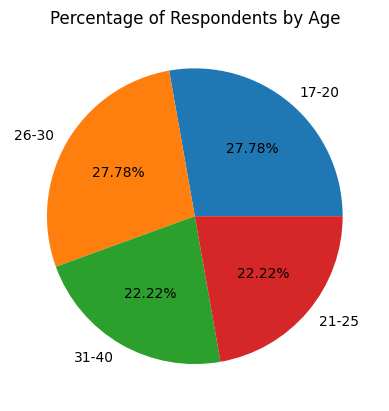

In [4]:
age_class = df["age"].value_counts()
age = age_class.index.get_level_values(0).tolist()
frequencies = age_class.values.tolist()

plt.title("Percentage of Respondents by Age")
plt.pie(
   frequencies,
   labels=age,
   autopct="%.2f%%"
)
plt.show()

#### Bar plot bahasa pemrograman/framework yang paling banyak digunakan dalam pengembangan front end

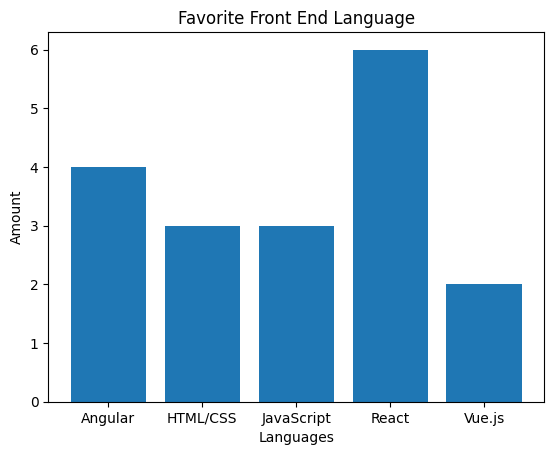

In [5]:
fav_fe_language = df.groupby(["favorite_front_end"]).count()
fe_language = fav_fe_language.index.get_level_values(0).tolist()
amount = fav_fe_language["name"]

plt.title("Favorite Front End Language")
plt.xlabel("Languages")
plt.ylabel("Amount")
plt.bar(fe_language, amount)
plt.show()

#### Bar plot bahasa pemrograman/framework yang paling banyak digunakan dalam pengembangan back end

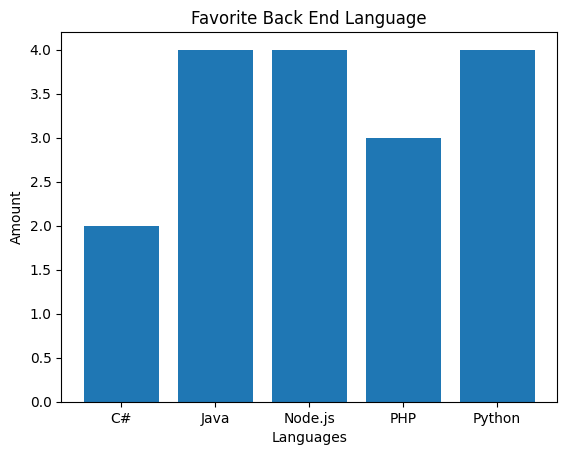

In [6]:
fav_be_language = df.groupby(["favorite_back_end"]).count()
be_language = fav_be_language.index.get_level_values(0).tolist()
amount = fav_be_language["name"]

plt.title("Favorite Back End Language")
plt.xlabel("Languages")
plt.ylabel("Amount")
plt.bar(be_language, amount)
plt.show()

#### Persentase bahasa pemrograman/framework yang dipilih dalam pengembangan front end

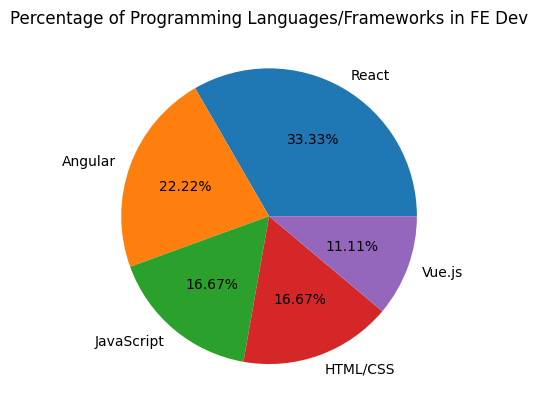

In [7]:
fav_fe_lang = df["favorite_front_end"].value_counts()
fav_fe = fav_fe_lang.index.get_level_values(0).tolist()
frequencies = fav_fe_lang.values.tolist()

plt.title("Percentage of Programming Languages/Frameworks in FE Dev")
plt.pie(
   frequencies,
   labels=fav_fe,
   autopct="%.2f%%"
)
plt.show()

#### Bar plot rentangan gaji per tahun yang paling banyak berdasarkan hasil survei

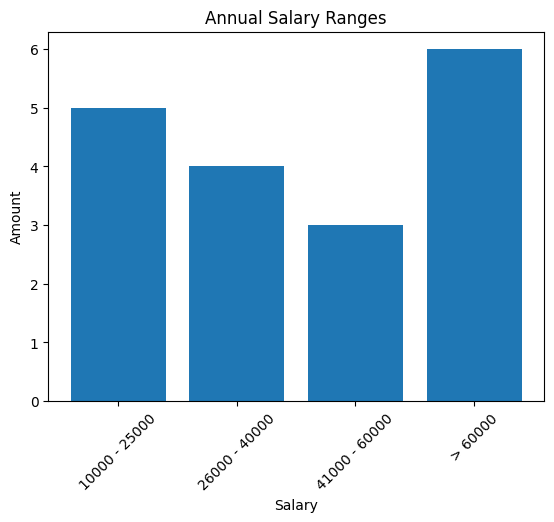

In [8]:
salary_per_year = df.groupby(["salary_per_year_in_USD"]).count()
salary = salary_per_year.index.get_level_values(0).tolist()
amount = salary_per_year["name"]

plt.title("Annual Salary Ranges")
plt.xlabel("Salary")
plt.ylabel("Amount")
plt.bar(salary, amount)
plt.xticks(rotation=45)
plt.show()